In [2]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from glob import glob

import librosa
import librosa.display
from IPython import display

In [3]:
audio_files = 'margot-orginal.wav'

In [4]:
y, sr = librosa.load('margot-original.wav')

In [5]:
print("Type: ", type(y))
print("Shape: ", y.shape)
y

Type:  <class 'numpy.ndarray'>
Shape:  (1752693,)


array([-0.00024327,  0.01192436,  0.0163403 , ..., -0.00114549,
       -0.00505643, -0.00413057], dtype=float32)

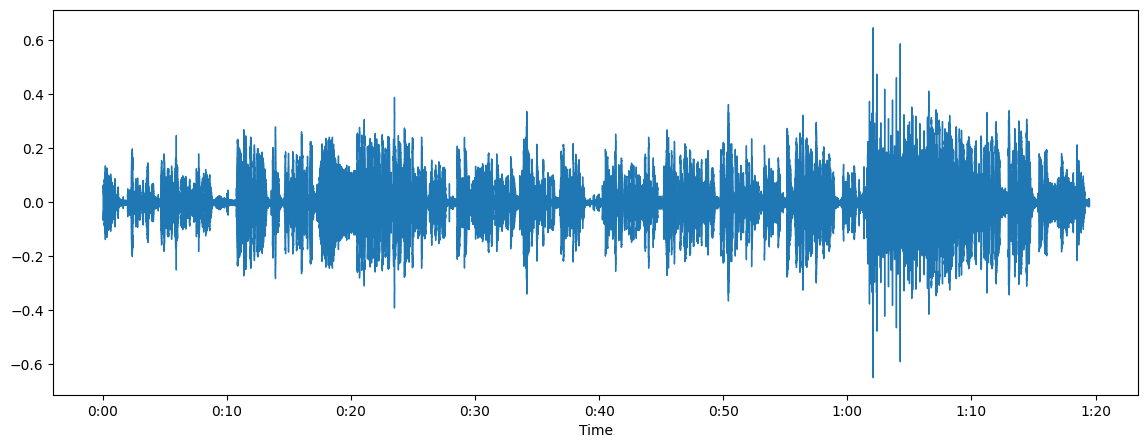

In [6]:
plt.figure(figsize=(14,5))
librosa.display.waveshow(y, sr=sr)


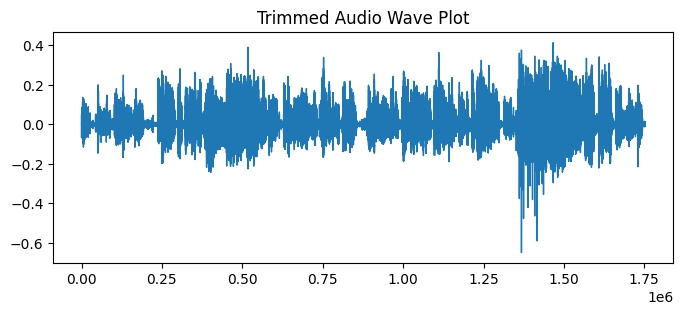

In [7]:
trimmed_y, index = librosa.effects.trim(y, top_db = 35)
pd.Series(trimmed_y).plot(figsize = (8, 3), lw = 1)
plt.title("Trimmed Audio Wave Plot")
plt.show()

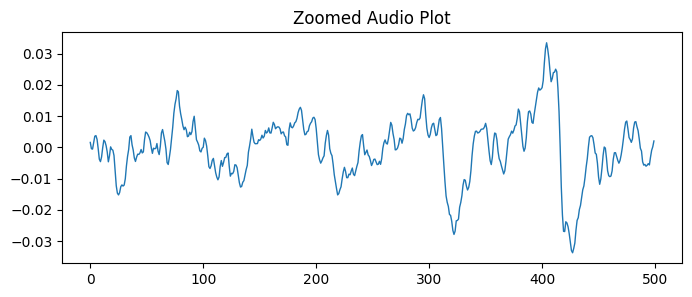

In [8]:
pd.Series(trimmed_y[25000:25500]).plot(figsize = (8, 3), lw = 1)
plt.title("Zoomed Audio Plot")
plt.show()

In [9]:
transformed_y = librosa.stft(y)
db = librosa.amplitude_to_db(abs(transformed_y))
db.shape

(1025, 3424)

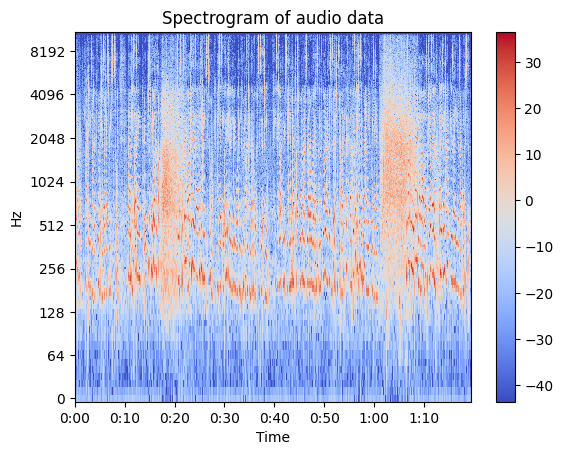

In [10]:
image = librosa.display.specshow(db, sr = sr, x_axis = "time", y_axis = "log")
plt.colorbar(image)
plt.title("Spectrogram of audio data")
plt.show()

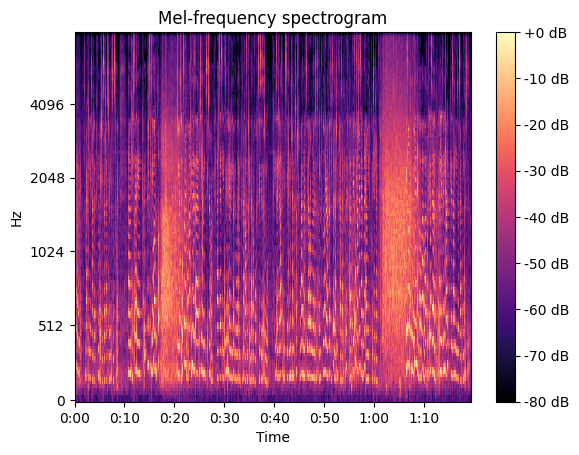

In [11]:
S = librosa.feature.melspectrogram(y=y, sr=sr)
fig, ax = plt.subplots()
S_dB = librosa.power_to_db(S, ref=np.max)
img = librosa.display.specshow(S_dB, x_axis='time',
                         y_axis='mel', sr=sr,
                         fmax=8000, ax=ax)
fig.colorbar(img, ax=ax, format='%+2.0f dB')
ax.set(title='Mel-frequency spectrogram')
plt.show()

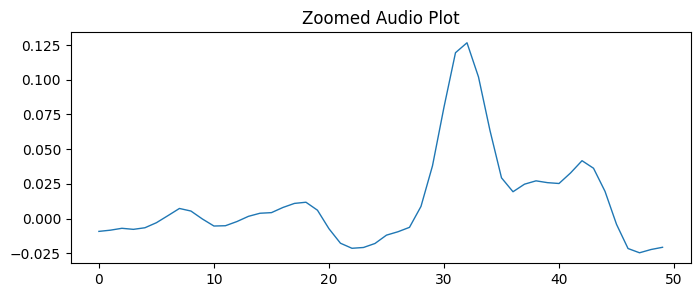

In [12]:
n0 = 80000
n1 = 80050
pd.Series(y[n0:n1]).plot(figsize = (8, 3), lw = 1)
plt.title("Zoomed Audio Plot")
plt.show()

In [13]:
zero_crossings = librosa.zero_crossings(y[n0:n1], pad = False)
print(zero_crossings.shape)
sum(zero_crossings)

(50,)


6

In [14]:
cent = librosa.feature.spectral_centroid(y=y, sr=sr)
frames = range(len(cent))
time = librosa.frames_to_time(frames)
S, phase = librosa.magphase(librosa.stft(y=y))
freqs, times, D = librosa.reassigned_spectrogram(y, fill_nan=True)
print(cent)

[[2344.87149229 2411.20648892 2413.30498464 ... 2325.40088715
  2185.97200474 2272.63585002]]


(20, 3424)


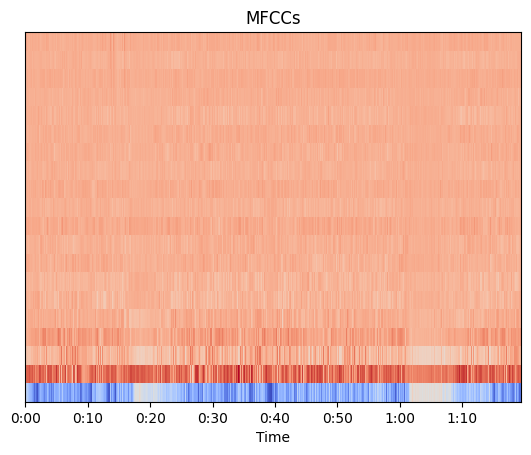

In [15]:
mfccs = librosa.feature.mfcc(y=y, sr=sr)
print(mfccs.shape)

librosa.display.specshow(mfccs, sr=sr, x_axis='time')
plt.title("MFCCs")
plt.show()

In [16]:
mfcc_data = pd.DataFrame(mfccs)
mfcc_data

,0,1,2,3,4,5,6,7,8,9,...,3414,3415,3416,3417,3418,3419,3420,3421,3422,3423
0,-253.061340,-226.100113,-219.380310,-208.341705,-201.844345,-200.802353,-206.173798,-202.450790,-201.308990,-199.124741,...,-421.211731,-425.290924,-418.161804,-403.298035,-387.606903,-385.781647,-380.628235,-371.923187,-370.945343,-397.790283
1,89.476456,89.190765,89.069489,91.005707,88.110451,86.089218,89.179611,95.253227,99.419701,93.358734,...,101.628304,95.610291,96.929672,100.910767,99.833023,95.110100,93.931015,93.756439,100.472839,97.151733
2,-59.683079,-55.941811,-55.884186,-54.092033,-49.980946,-49.546391,-51.276142,-52.223793,-54.707920,-52.910458,...,-10.455515,-20.133102,-15.979637,-9.844685,-9.248682,-8.938965,-18.868422,-26.572231,-24.198734,-20.443214
3,-1.763771,1.182257,2.620707,0.285132,-8.034876,-11.776896,-10.523169,-9.763942,-9.832907,-9.210743,...,26.426615,19.769411,20.620140,26.549450,35.714989,40.254585,31.484835,23.989952,21.937260,23.532970
4,-4.799853,-5.021313,-6.664235,-5.438436,-4.805485,-7.202219,-7.483481,-10.740021,-11.336685,-9.006223,...,-6.793568,-14.058146,-13.348923,-10.773821,-5.261650,-10.322662,-17.956411,-20.825439,-16.462622,-15.338346
5,0.998440,3.234301,-6.129506,-5.904395,0.329478,-1.238340,-5.213200,-9.904699,-13.128090,-14.023140,...,-0.303476,-6.323198,3.650749,0.427075,1.328498,1.112654,-0.849586,0.334827,0.453569,-1.966691
6,-13.798647,-10.269093,-13.412958,-21.395920,-25.178440,-22.182514,-21.315102,-22.261070,-23.967766,-22.888630,...,-13.422018,-18.298904,-15.382015,-16.602167,-6.452271,-2.808666,-4.066901,-2.428741,-1.580075,-1.229724
7,3.473777,1.589448,0.409892,-3.314394,-1.968071,0.984838,2.369257,1.826677,2.190222,-0.270656,...,-18.913376,-19.986145,-20.326057,-19.329620,-11.673151,-10.260269,-11.249290,-16.803301,-11.312259,3.083821
8,-1.463009,-2.957531,-7.515168,-10.527521,-12.013325,-16.394539,-19.745132,-13.957175,-17.600697,-19.666059,...,-10.328386,-12.067402,-15.308071,-11.028982,-10.519650,-13.518148,-3.510954,1.757222,2.171250,8.302729
9,2.008824,1.546258,-1.156421,-5.862546,-8.680353,-5.535511,2.716055,7.031413,2.451492,-2.600434,...,0.505233,0.492560,-7.423549,-3.769779,0.533913,3.942457,7.358910,15.240127,14.366035,8.163774


In [17]:
cent_spect=pd.DataFrame(cent)
CENT=cent_spect.T

In [18]:
CENT.shape
cent_spect=cent_spect.T

In [19]:
mfcc_data=mfcc_data.T

mfcc_data

In [20]:
zero_crossings

array([False, False, False, False, False, False,  True, False, False,
        True, False, False, False,  True, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False, False])

In [21]:
mfcc_data['cent_value']=cent_spect
mfcc_data

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,cent_value
0,-253.061340,89.476456,-59.683079,-1.763771,-4.799853,0.998440,-13.798647,3.473777,-1.463009,2.008824,...,8.428741,-8.910158,-7.219576,-15.871511,-2.758501,-12.808625,-6.711633,-8.621979,2.490251,2344.871492
1,-226.100113,89.190765,-55.941811,1.182257,-5.021313,3.234301,-10.269093,1.589448,-2.957531,1.546258,...,3.137810,-9.497795,-3.630197,-13.866224,-2.870373,-10.991777,-5.601021,-6.159401,2.557986,2411.206489
2,-219.380310,89.069489,-55.884186,2.620707,-6.664235,-6.129506,-13.412958,0.409892,-7.515168,-1.156421,...,-3.735119,-8.786047,-0.366759,-14.170190,-5.081349,-8.791756,-4.470801,-5.993565,5.893967,2413.304985
3,-208.341705,91.005707,-54.092033,0.285132,-5.438436,-5.904395,-21.395920,-3.314394,-10.527521,-5.862546,...,-9.416653,-13.616148,-4.875256,-11.384203,-7.688056,-6.412288,-8.771140,-8.379225,4.696273,2315.078600
4,-201.844345,88.110451,-49.980946,-8.034876,-4.805485,0.329478,-25.178440,-1.968071,-12.013325,-8.680353,...,-7.772109,-10.099348,0.764094,-9.826584,-10.984646,-6.563350,-10.325321,-9.522179,-0.910977,2336.137297
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3419,-385.781647,95.110100,-8.938965,40.254585,-10.322662,1.112654,-2.808666,-10.260269,-13.518148,3.942457,...,-6.842448,-3.832134,-7.813974,-0.365898,-13.364599,-25.092762,-7.154605,-2.564040,-6.221048,2191.164910
3420,-380.628235,93.931015,-18.868422,31.484835,-17.956411,-0.849586,-4.066901,-11.249290,-3.510954,7.358910,...,-10.261468,-10.557068,-11.029032,-2.789149,-10.421610,-22.935953,-13.915841,-8.873276,-9.782976,2246.394997
3421,-371.923187,93.756439,-26.572231,23.989952,-20.825439,0.334827,-2.428741,-16.803301,1.757222,15.240127,...,-5.446373,-15.025659,-15.990118,-14.981573,-8.677620,-14.721779,-14.675779,-9.531334,-10.360668,2325.400887
3422,-370.945343,100.472839,-24.198734,21.937260,-16.462622,0.453569,-1.580075,-11.312259,2.171250,14.366035,...,-3.128490,-12.948537,-11.003894,-11.912314,-12.045790,-14.553963,-10.187176,-8.039015,-6.883220,2185.972005


In [22]:
spect_width=librosa.feature.spectral_bandwidth(y=y,sr=sr)
spect_width

array([[2073.86112895, 2127.04188391, 2125.75531831, ..., 2214.89501891,
        2208.92882305, 2269.40182823]])

In [23]:
spect_width.shape

(1, 3424)

In [24]:
mfcc_data['spect_width']=spect_width.T

In [25]:
mfcc_data

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,cent_value,spect_width
0,-253.061340,89.476456,-59.683079,-1.763771,-4.799853,0.998440,-13.798647,3.473777,-1.463009,2.008824,...,-8.910158,-7.219576,-15.871511,-2.758501,-12.808625,-6.711633,-8.621979,2.490251,2344.871492,2073.861129
1,-226.100113,89.190765,-55.941811,1.182257,-5.021313,3.234301,-10.269093,1.589448,-2.957531,1.546258,...,-9.497795,-3.630197,-13.866224,-2.870373,-10.991777,-5.601021,-6.159401,2.557986,2411.206489,2127.041884
2,-219.380310,89.069489,-55.884186,2.620707,-6.664235,-6.129506,-13.412958,0.409892,-7.515168,-1.156421,...,-8.786047,-0.366759,-14.170190,-5.081349,-8.791756,-4.470801,-5.993565,5.893967,2413.304985,2125.755318
3,-208.341705,91.005707,-54.092033,0.285132,-5.438436,-5.904395,-21.395920,-3.314394,-10.527521,-5.862546,...,-13.616148,-4.875256,-11.384203,-7.688056,-6.412288,-8.771140,-8.379225,4.696273,2315.078600,2122.440340
4,-201.844345,88.110451,-49.980946,-8.034876,-4.805485,0.329478,-25.178440,-1.968071,-12.013325,-8.680353,...,-10.099348,0.764094,-9.826584,-10.984646,-6.563350,-10.325321,-9.522179,-0.910977,2336.137297,2216.074315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3419,-385.781647,95.110100,-8.938965,40.254585,-10.322662,1.112654,-2.808666,-10.260269,-13.518148,3.942457,...,-3.832134,-7.813974,-0.365898,-13.364599,-25.092762,-7.154605,-2.564040,-6.221048,2191.164910,2301.481004
3420,-380.628235,93.931015,-18.868422,31.484835,-17.956411,-0.849586,-4.066901,-11.249290,-3.510954,7.358910,...,-10.557068,-11.029032,-2.789149,-10.421610,-22.935953,-13.915841,-8.873276,-9.782976,2246.394997,2249.740215
3421,-371.923187,93.756439,-26.572231,23.989952,-20.825439,0.334827,-2.428741,-16.803301,1.757222,15.240127,...,-15.025659,-15.990118,-14.981573,-8.677620,-14.721779,-14.675779,-9.531334,-10.360668,2325.400887,2214.895019
3422,-370.945343,100.472839,-24.198734,21.937260,-16.462622,0.453569,-1.580075,-11.312259,2.171250,14.366035,...,-12.948537,-11.003894,-11.912314,-12.045790,-14.553963,-10.187176,-8.039015,-6.883220,2185.972005,2208.928823


In [26]:
rms=librosa.feature.rms(y=y)
rms

array([[0.01155843, 0.0144471 , 0.01856681, ..., 0.00430419, 0.00356614,
        0.00310581]], dtype=float32)

In [27]:
mfcc_data['rms']=rms.T

In [28]:
mfcc_data

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,cent_value,spect_width,rms
0,-253.061340,89.476456,-59.683079,-1.763771,-4.799853,0.998440,-13.798647,3.473777,-1.463009,2.008824,...,-7.219576,-15.871511,-2.758501,-12.808625,-6.711633,-8.621979,2.490251,2344.871492,2073.861129,0.011558
1,-226.100113,89.190765,-55.941811,1.182257,-5.021313,3.234301,-10.269093,1.589448,-2.957531,1.546258,...,-3.630197,-13.866224,-2.870373,-10.991777,-5.601021,-6.159401,2.557986,2411.206489,2127.041884,0.014447
2,-219.380310,89.069489,-55.884186,2.620707,-6.664235,-6.129506,-13.412958,0.409892,-7.515168,-1.156421,...,-0.366759,-14.170190,-5.081349,-8.791756,-4.470801,-5.993565,5.893967,2413.304985,2125.755318,0.018567
3,-208.341705,91.005707,-54.092033,0.285132,-5.438436,-5.904395,-21.395920,-3.314394,-10.527521,-5.862546,...,-4.875256,-11.384203,-7.688056,-6.412288,-8.771140,-8.379225,4.696273,2315.078600,2122.440340,0.021444
4,-201.844345,88.110451,-49.980946,-8.034876,-4.805485,0.329478,-25.178440,-1.968071,-12.013325,-8.680353,...,0.764094,-9.826584,-10.984646,-6.563350,-10.325321,-9.522179,-0.910977,2336.137297,2216.074315,0.024720
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3419,-385.781647,95.110100,-8.938965,40.254585,-10.322662,1.112654,-2.808666,-10.260269,-13.518148,3.942457,...,-7.813974,-0.365898,-13.364599,-25.092762,-7.154605,-2.564040,-6.221048,2191.164910,2301.481004,0.004278
3420,-380.628235,93.931015,-18.868422,31.484835,-17.956411,-0.849586,-4.066901,-11.249290,-3.510954,7.358910,...,-11.029032,-2.789149,-10.421610,-22.935953,-13.915841,-8.873276,-9.782976,2246.394997,2249.740215,0.004348
3421,-371.923187,93.756439,-26.572231,23.989952,-20.825439,0.334827,-2.428741,-16.803301,1.757222,15.240127,...,-15.990118,-14.981573,-8.677620,-14.721779,-14.675779,-9.531334,-10.360668,2325.400887,2214.895019,0.004304
3422,-370.945343,100.472839,-24.198734,21.937260,-16.462622,0.453569,-1.580075,-11.312259,2.171250,14.366035,...,-11.003894,-11.912314,-12.045790,-14.553963,-10.187176,-8.039015,-6.883220,2185.972005,2208.928823,0.003566


In [30]:
zeros=librosa.feature.zero_crossing_rate(y=y,frame_length=2048,hop_length=512,center=True)
mfcc_data['zero_crossing_rate']=zeros.T
mfcc_data

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,cent_value,spect_width,rms,zero_crossing_rate
0,-253.061340,89.476456,-59.683079,-1.763771,-4.799853,0.998440,-13.798647,3.473777,-1.463009,2.008824,...,-15.871511,-2.758501,-12.808625,-6.711633,-8.621979,2.490251,2344.871492,2073.861129,0.011558,0.077637
1,-226.100113,89.190765,-55.941811,1.182257,-5.021313,3.234301,-10.269093,1.589448,-2.957531,1.546258,...,-13.866224,-2.870373,-10.991777,-5.601021,-6.159401,2.557986,2411.206489,2127.041884,0.014447,0.118164
2,-219.380310,89.069489,-55.884186,2.620707,-6.664235,-6.129506,-13.412958,0.409892,-7.515168,-1.156421,...,-14.170190,-5.081349,-8.791756,-4.470801,-5.993565,5.893967,2413.304985,2125.755318,0.018567,0.148926
3,-208.341705,91.005707,-54.092033,0.285132,-5.438436,-5.904395,-21.395920,-3.314394,-10.527521,-5.862546,...,-11.384203,-7.688056,-6.412288,-8.771140,-8.379225,4.696273,2315.078600,2122.440340,0.021444,0.141113
4,-201.844345,88.110451,-49.980946,-8.034876,-4.805485,0.329478,-25.178440,-1.968071,-12.013325,-8.680353,...,-9.826584,-10.984646,-6.563350,-10.325321,-9.522179,-0.910977,2336.137297,2216.074315,0.024720,0.131836
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3419,-385.781647,95.110100,-8.938965,40.254585,-10.322662,1.112654,-2.808666,-10.260269,-13.518148,3.942457,...,-0.365898,-13.364599,-25.092762,-7.154605,-2.564040,-6.221048,2191.164910,2301.481004,0.004278,0.102539
3420,-380.628235,93.931015,-18.868422,31.484835,-17.956411,-0.849586,-4.066901,-11.249290,-3.510954,7.358910,...,-2.789149,-10.421610,-22.935953,-13.915841,-8.873276,-9.782976,2246.394997,2249.740215,0.004348,0.109375
3421,-371.923187,93.756439,-26.572231,23.989952,-20.825439,0.334827,-2.428741,-16.803301,1.757222,15.240127,...,-14.981573,-8.677620,-14.721779,-14.675779,-9.531334,-10.360668,2325.400887,2214.895019,0.004304,0.113770
3422,-370.945343,100.472839,-24.198734,21.937260,-16.462622,0.453569,-1.580075,-11.312259,2.171250,14.366035,...,-11.912314,-12.045790,-14.553963,-10.187176,-8.039015,-6.883220,2185.972005,2208.928823,0.003566,0.100586


In [31]:
#mfcc_data['chroma_stft']=db
db.shape


(1025, 3424)

In [32]:
roll_off=librosa.feature.spectral_rolloff(y=y, sr=sr)

In [33]:
roll_off.shape

(1, 3424)

In [34]:
mfcc_data['roll_off']=roll_off.T
mfcc_data

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,cent_value,spect_width,rms,zero_crossing_rate,roll_off
0,-253.061340,89.476456,-59.683079,-1.763771,-4.799853,0.998440,-13.798647,3.473777,-1.463009,2.008824,...,-2.758501,-12.808625,-6.711633,-8.621979,2.490251,2344.871492,2073.861129,0.011558,0.077637,4220.507812
1,-226.100113,89.190765,-55.941811,1.182257,-5.021313,3.234301,-10.269093,1.589448,-2.957531,1.546258,...,-2.870373,-10.991777,-5.601021,-6.159401,2.557986,2411.206489,2127.041884,0.014447,0.118164,4446.606445
2,-219.380310,89.069489,-55.884186,2.620707,-6.664235,-6.129506,-13.412958,0.409892,-7.515168,-1.156421,...,-5.081349,-8.791756,-4.470801,-5.993565,5.893967,2413.304985,2125.755318,0.018567,0.148926,4285.107422
3,-208.341705,91.005707,-54.092033,0.285132,-5.438436,-5.904395,-21.395920,-3.314394,-10.527521,-5.862546,...,-7.688056,-6.412288,-8.771140,-8.379225,4.696273,2315.078600,2122.440340,0.021444,0.141113,4242.041016
4,-201.844345,88.110451,-49.980946,-8.034876,-4.805485,0.329478,-25.178440,-1.968071,-12.013325,-8.680353,...,-10.984646,-6.563350,-10.325321,-9.522179,-0.910977,2336.137297,2216.074315,0.024720,0.131836,4586.572266
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3419,-385.781647,95.110100,-8.938965,40.254585,-10.322662,1.112654,-2.808666,-10.260269,-13.518148,3.942457,...,-13.364599,-25.092762,-7.154605,-2.564040,-6.221048,2191.164910,2301.481004,0.004278,0.102539,4392.773438
3420,-380.628235,93.931015,-18.868422,31.484835,-17.956411,-0.849586,-4.066901,-11.249290,-3.510954,7.358910,...,-10.421610,-22.935953,-13.915841,-8.873276,-9.782976,2246.394997,2249.740215,0.004348,0.109375,4392.773438
3421,-371.923187,93.756439,-26.572231,23.989952,-20.825439,0.334827,-2.428741,-16.803301,1.757222,15.240127,...,-8.677620,-14.721779,-14.675779,-9.531334,-10.360668,2325.400887,2214.895019,0.004304,0.113770,4414.306641
3422,-370.945343,100.472839,-24.198734,21.937260,-16.462622,0.453569,-1.580075,-11.312259,2.171250,14.366035,...,-12.045790,-14.553963,-10.187176,-8.039015,-6.883220,2185.972005,2208.928823,0.003566,0.100586,4285.107422


In [35]:

chroma_stft = librosa.feature.chroma_stft(y=trimmed_y, sr=sr)

In [36]:
chroma_stft.shape

(12, 3424)

In [37]:
roll_off=librosa.feature.spectral_rolloff(y=y, sr=sr)
roll_off.shape

(1, 3424)

In [38]:
 pdf=mfcc_data.to_csv('data_audio1')


In [39]:
data=pd.DataFrame(chroma_stft)

In [40]:
mfcc_data['chroma_stft']=data.mean()

In [42]:
mfcc_data

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,cent_value,spect_width,rms,zero_crossing_rate,roll_off,chroma_stft
0,-253.061340,89.476456,-59.683079,-1.763771,-4.799853,0.998440,-13.798647,3.473777,-1.463009,2.008824,...,-12.808625,-6.711633,-8.621979,2.490251,2344.871492,2073.861129,0.011558,0.077637,4220.507812,0.677860
1,-226.100113,89.190765,-55.941811,1.182257,-5.021313,3.234301,-10.269093,1.589448,-2.957531,1.546258,...,-10.991777,-5.601021,-6.159401,2.557986,2411.206489,2127.041884,0.014447,0.118164,4446.606445,0.666833
2,-219.380310,89.069489,-55.884186,2.620707,-6.664235,-6.129506,-13.412958,0.409892,-7.515168,-1.156421,...,-8.791756,-4.470801,-5.993565,5.893967,2413.304985,2125.755318,0.018567,0.148926,4285.107422,0.781085
3,-208.341705,91.005707,-54.092033,0.285132,-5.438436,-5.904395,-21.395920,-3.314394,-10.527521,-5.862546,...,-6.412288,-8.771140,-8.379225,4.696273,2315.078600,2122.440340,0.021444,0.141113,4242.041016,0.415792
4,-201.844345,88.110451,-49.980946,-8.034876,-4.805485,0.329478,-25.178440,-1.968071,-12.013325,-8.680353,...,-6.563350,-10.325321,-9.522179,-0.910977,2336.137297,2216.074315,0.024720,0.131836,4586.572266,0.232869
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3419,-385.781647,95.110100,-8.938965,40.254585,-10.322662,1.112654,-2.808666,-10.260269,-13.518148,3.942457,...,-25.092762,-7.154605,-2.564040,-6.221048,2191.164910,2301.481004,0.004278,0.102539,4392.773438,0.510971
3420,-380.628235,93.931015,-18.868422,31.484835,-17.956411,-0.849586,-4.066901,-11.249290,-3.510954,7.358910,...,-22.935953,-13.915841,-8.873276,-9.782976,2246.394997,2249.740215,0.004348,0.109375,4392.773438,0.615212
3421,-371.923187,93.756439,-26.572231,23.989952,-20.825439,0.334827,-2.428741,-16.803301,1.757222,15.240127,...,-14.721779,-14.675779,-9.531334,-10.360668,2325.400887,2214.895019,0.004304,0.113770,4414.306641,0.844529
3422,-370.945343,100.472839,-24.198734,21.937260,-16.462622,0.453569,-1.580075,-11.312259,2.171250,14.366035,...,-14.553963,-10.187176,-8.039015,-6.883220,2185.972005,2208.928823,0.003566,0.100586,4285.107422,0.552005


In [43]:
mfcc_data.to_csv('data_audio1_00')
